In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

oil = yf.download("CL=F", start="2025-06-01", end="2025-07-31")

oil['returns'] = oil['Close'].pct_change() * 100
returns = oil['returns'].dropna()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [2]:
# Fit GARCH(1,1)
model = arch_model(returns, vol='Garch', p=1, q=1)
results = model.fit(disp='off')

# Save conditional volatility into the DataFrame
oil.loc[returns.index, 'garch_vol'] = results.conditional_volatility

# Also compute rolling volatility for comparison
oil['rolling_vol'] = oil['returns'].rolling(window=5).std()


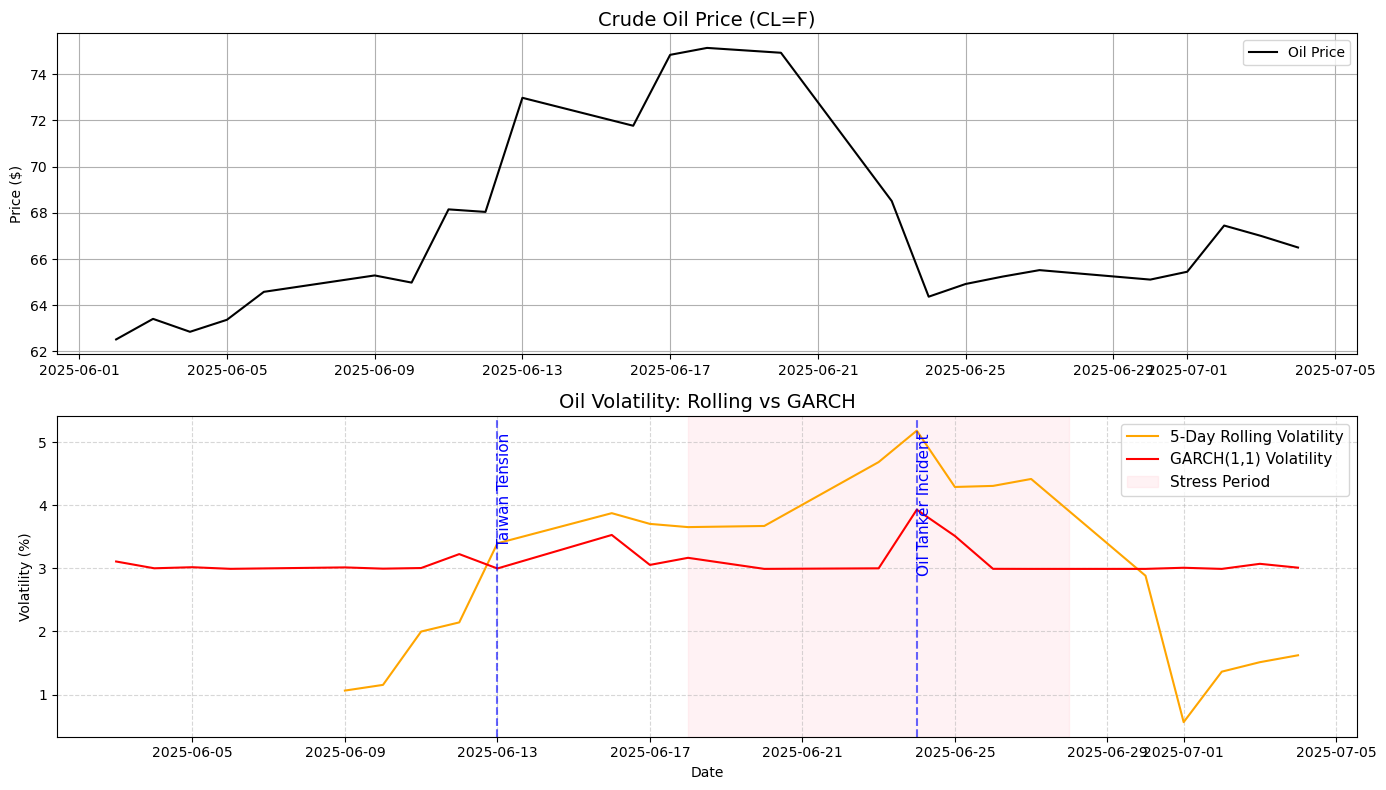

In [18]:
plt.figure(figsize=(14, 8))

# Price plot
plt.subplot(2, 1, 1)
plt.plot(oil['Close'], label='Oil Price', color='black')
plt.title('Crude Oil Price (CL=F)', fontsize=14)
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()

# Volatility comparison plot
plt.subplot(2, 1, 2)
plt.plot(oil['rolling_vol'], label='5-Day Rolling Volatility', color='orange')
plt.plot(oil['garch_vol'], label='GARCH(1,1) Volatility', color='red')
plt.title('Oil Volatility: Rolling vs GARCH', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.grid(True)
plt.legend()

event_dates = {
    "2025-06-13": "Taiwan Tension",
    "2025-06-24": "Oil Tanker Incident",
}

for date, label in event_dates.items():
    plt.axvline(pd.to_datetime(date), color='blue', linestyle='--', alpha=0.6)
    plt.text(pd.to_datetime(date), plt.ylim()[1]*0.95, label,
             rotation=90, verticalalignment='top', color='blue', fontsize=11)

stress_start = pd.to_datetime("2025-06-18")
stress_end = pd.to_datetime("2025-06-28")

plt.axvspan(stress_start, stress_end, color='pink', alpha=0.2, label='Stress Period')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=11)


plt.tight_layout()
plt.show()
